In [5]:
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt

In [9]:
# Create random data array
rng = np.random.default_rng()
rand_binary = rng.integers(low=0, high=2, size=(32, 64))

In [10]:
rand_binary

array([[0, 1, 0, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 0, 1]])

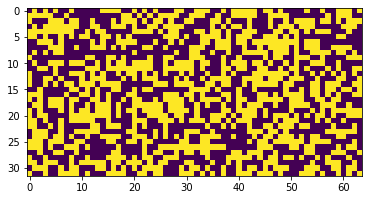

In [11]:
plt.imshow(rand_binary)

In [12]:
U, s, VT = svd(rand_binary)

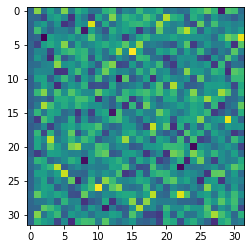

In [13]:
plt.imshow(U)

In [17]:
U.shape

(32, 32)

In [18]:
U

array([[-0.17135165,  0.33832063, -0.10220366, ...,  0.23756214,
         0.20741031, -0.13607816],
       [-0.16030954, -0.17060683, -0.29140086, ..., -0.11821927,
        -0.19882538, -0.08103969],
       [-0.17410368, -0.0081739 ,  0.06799088, ...,  0.00571061,
        -0.05564945, -0.02728509],
       ...,
       [-0.17203951, -0.16136823,  0.26458001, ..., -0.05745283,
         0.17588239, -0.27801666],
       [-0.1896197 ,  0.32923769, -0.10825769, ...,  0.0798145 ,
        -0.15425484,  0.14802665],
       [-0.18799938,  0.16730263,  0.07448412, ...,  0.17954418,
        -0.11282238, -0.05576871]])

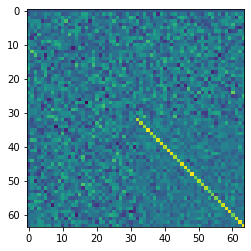

In [14]:
plt.imshow(VT)

In [19]:
VT.shape

(64, 64)

In [20]:
VT

array([[-0.14388935, -0.12673672, -0.12289023, ..., -0.11984936,
        -0.11961455, -0.09013331],
       [-0.19982804, -0.0519644 ,  0.01974473, ...,  0.16718621,
         0.01863151,  0.07033329],
       [ 0.06606304, -0.07203069, -0.11589861, ..., -0.23679739,
         0.23761813,  0.0788398 ],
       ...,
       [-0.02602378, -0.03549564,  0.00731596, ...,  0.56888811,
         0.01391844,  0.03491127],
       [-0.1061196 ,  0.02303422, -0.07751308, ..., -0.00419674,
         0.63580157, -0.01935445],
       [-0.11944566,  0.05848215,  0.0246839 , ..., -0.06630928,
        -0.01223524,  0.6255193 ]])

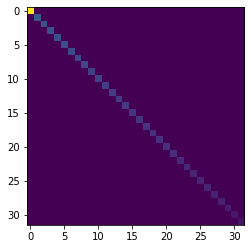

In [16]:
plt.imshow(np.diag(s))

In [21]:
s

array([23.39373797,  6.45910776,  6.00557197,  5.76841064,  5.69945839,
        5.48859849,  5.18889524,  5.09025881,  4.98213005,  4.65643172,
        4.39364927,  4.23753367,  4.21288125,  3.97520567,  3.8712815 ,
        3.67400065,  3.58012022,  3.5071622 ,  3.43749186,  3.28342659,
        3.19476253,  2.99463485,  2.71727104,  2.63001655,  2.5440868 ,
        2.36335557,  2.20283636,  2.15476428,  2.0778871 ,  1.81551808,
        1.48101737,  1.37003484])

In [22]:
# Largest eigen-component
U[:, 0]

array([-0.17135165, -0.16030954, -0.17410368, -0.18755767, -0.19186915,
       -0.16777225, -0.17679781, -0.17286174, -0.14703415, -0.12796071,
       -0.19372201, -0.19553016, -0.16948369, -0.18536121, -0.20449506,
       -0.13914352, -0.17328841, -0.20792732, -0.19401402, -0.1997661 ,
       -0.20946965, -0.18097023, -0.13825637, -0.1567377 , -0.18741433,
       -0.17407722, -0.17881169, -0.14008559, -0.16214868, -0.17203951,
       -0.1896197 , -0.18799938])

In [23]:
# Smallest eigen-component
U[:, -1]

array([-0.13607816, -0.08103969, -0.02728509,  0.06904186,  0.49010223,
        0.25050469, -0.05681676, -0.22271223, -0.13285292,  0.20111655,
        0.17765271,  0.1156459 ,  0.15506781, -0.0436499 ,  0.27387391,
        0.14102674, -0.17098735,  0.03445332, -0.23095435,  0.01063727,
       -0.2964022 , -0.14618883,  0.12206724,  0.1654926 , -0.14562598,
       -0.05471072, -0.12381468,  0.01180463, -0.11121157, -0.27801666,
        0.14802665, -0.05576871])

Interesting that the largest component is all the same size ~ -0.2 and sign. Whereas the smallest component has a mixture of sizes and signs.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html

In [24]:
np.dot(U[:, 0], U[:, 0].T)

1.0000000000000002

Matrix is unitary in that the dot product of each vector with itself is ~1.

I.e. u_0\*u_0+u_1\*u_1 + etc = 1 or u_0^2 + u_1^2 + etc = 1

In [28]:
# Mixture of u's for x_0 = U.sigma.VT[:, 0]
Sigma = np.diag(s)
Sigma.shape

(32, 32)

In [29]:
U.dot(Sigma.dot(VT[0:32, 0]))

array([-6.14439055e-15,  1.00000000e+00,  1.00000000e+00, -6.42368103e-15,
        1.00000000e+00,  1.00000000e+00, -7.04818148e-15, -6.54337695e-15,
       -7.26849136e-15,  1.00000000e+00, -7.93809463e-15, -5.40886780e-15,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00, -4.99947306e-15,
        1.00000000e+00,  1.00000000e+00, -8.70831185e-15,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00, -4.39925874e-15,
       -7.56686380e-15,  1.00000000e+00,  1.00000000e+00, -5.97113504e-15,
        1.00000000e+00,  1.00000000e+00, -9.35015954e-15,  1.00000000e+00])

In [30]:
rand_binary[:,0]

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [ ]:
U[:3,0].dot(Sigma[0,0]*(VT[0, 0]))

In [32]:
U[:,0].dot(Sigma[0,0]*(VT[0, 0]))

array([0.57678848, 0.53961952, 0.5860521 , 0.63133973, 0.64585262,
       0.56473983, 0.59512086, 0.58187161, 0.4949331 , 0.4307298 ,
       0.65208957, 0.658176  , 0.5705007 , 0.62394619, 0.68835282,
       0.46837237, 0.58330781, 0.6999062 , 0.65307251, 0.67243464,
       0.70509786, 0.60916568, 0.46538614, 0.52759631, 0.63085721,
       0.58596305, 0.60189978, 0.47154349, 0.54581028, 0.57910388,
       0.63828073, 0.63282657])

First eigenvector is the average power level.

In [35]:
U[:,1].dot(Sigma[1,1]*(VT[1, 0]))

array([-0.43667412,  0.22020409,  0.01055014, -0.26259966,  0.21826318,
        0.37805627,  0.03839508, -0.04833511,  0.17286788,  0.01619887,
       -0.10019941,  0.14287285, -0.23051353,  0.19564538,  0.10216392,
       -0.2233878 ,  0.42461281,  0.20587278, -0.22659279, -0.12833659,
       -0.12979354,  0.41383939, -0.21438971,  0.09523218, -0.09520762,
        0.04886431,  0.01361305, -0.34426998,  0.12874331,  0.20827973,
       -0.42495067, -0.21593932])

In [36]:
U[:,2].dot(Sigma[2,2]*(VT[2, 0]))

array([-0.04054893, -0.11561223,  0.02697514, -0.01937128, -0.20140864,
        0.02577203, -0.01569648, -0.02899048, -0.01863935, -0.00981228,
        0.03656493,  0.03916538,  0.13065124, -0.04684778,  0.15353749,
       -0.03743032,  0.0899244 , -0.00428092, -0.11515298, -0.00700019,
       -0.04343103, -0.06756683,  0.04843585,  0.03690001,  0.03024162,
        0.0394807 ,  0.03733368,  0.03376752, -0.0332654 ,  0.10497115,
       -0.04295084,  0.0295513 ])

Now let's have a look at random ternary data.

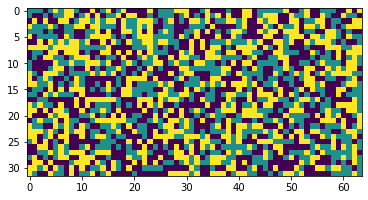

In [37]:
rand_ternary = rng.integers(low=-1, high=2, size=(32, 64))
plt.imshow(rand_ternary)

In [38]:
U2, s2, VT2 = svd(rand_ternary)

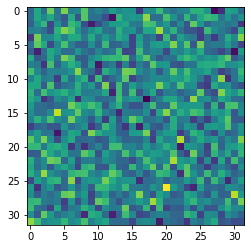

In [39]:
plt.imshow(U2)

In [40]:
U2

array([[-0.13650399,  0.14093584, -0.11023736, ...,  0.1195147 ,
         0.08959423, -0.11787704],
       [-0.12144945,  0.14068289, -0.00144888, ...,  0.05813594,
        -0.08938773,  0.03468274],
       [-0.16821313,  0.05698352,  0.20361344, ..., -0.09241885,
        -0.04426964, -0.32126707],
       ...,
       [ 0.22686281, -0.10285739, -0.13998591, ...,  0.16228876,
         0.00423667,  0.00829773],
       [ 0.03457227, -0.19300518,  0.30317556, ...,  0.02367185,
        -0.05086011, -0.15542806],
       [ 0.38186836,  0.23526876, -0.00136806, ..., -0.16507895,
        -0.23730456, -0.22695077]])

In [41]:
# Largest eigen-component
U2[:, 0]

array([-0.13650399, -0.12144945, -0.16821313, -0.03623136, -0.31846785,
       -0.09709666, -0.16422359,  0.15037155, -0.0298593 ,  0.24847482,
       -0.03068034,  0.12606078,  0.18161574,  0.1554723 ,  0.08177568,
        0.02697625, -0.0202032 , -0.28904978, -0.01721929,  0.29267636,
        0.20434898, -0.19209381,  0.17255637,  0.12781706,  0.17054641,
       -0.25165985,  0.07265824,  0.02991066,  0.20193959,  0.22686281,
        0.03457227,  0.38186836])

In [42]:
Sigma2 = np.diag(s2)
U2[:,0].dot(Sigma2[0,0]*(VT2[0, 0]))

array([-0.27869073, -0.24795492, -0.34342908, -0.07397105, -0.65019371,
       -0.1982355 , -0.33528391,  0.30700316, -0.06096165,  0.5072938 ,
       -0.06263793,  0.25736954,  0.37079225,  0.31741701,  0.16695573,
        0.05507554, -0.04124748, -0.59013288, -0.03515544,  0.59753701,
        0.41720512, -0.39218459,  0.35229636,  0.26095523,  0.34819276,
       -0.51379644,  0.14834129,  0.06106652,  0.41228604,  0.46317006,
        0.07058381,  0.77963413])

In [43]:
s2

array([10.6438078 , 10.22780233,  9.83356001,  9.64535221,  8.99657804,
        8.95252976,  8.669305  ,  8.12412534,  8.06469015,  7.42099661,
        7.31800485,  6.99211553,  6.81054066,  6.62736521,  6.17853425,
        6.12266889,  5.97131785,  5.74991025,  5.60800158,  4.9731917 ,
        4.90067076,  4.47659952,  4.32088236,  4.20487012,  3.93855187,
        3.77838197,  3.48830159,  3.27981581,  3.13950872,  2.86782627,
        2.54120349,  2.24605984])